In [1]:
# general
import sys, os, path
import datetime

# nn related
import torch
import torch as th
import torch.nn as nn
import numpy as np
from numpy import linalg as la

# postprocessing
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import matplotlib
from scipy.interpolate import griddata
import scipy as sp

import seaborn as sns
import tikzplotlib as tikz
from scipy import ndimage

# own scrips
sys.path.insert(1, '/home/leonriccius/PycharmProjects/data_driven_rans')

from scripts import preProcess
from scripts import TensorBasedNN
from scripts.TensorBasedNN import TBNN_generic
from scripts.utilities import *
from scripts.torchToFoam import writesymmtensor
from scripts.barymap import BarMap
from scripts import *

## Periodic Hills

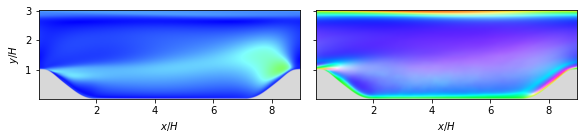

In [6]:
# load in dns and rans data
path = '/home/leonriccius/Documents/Fluid_Data/tensordata/PeriodicHills/5600'
b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
grid = th.load(os.sep.join([path, 'grid-torch.th']))

barm_rans = BarMap()
barm_rans.load_from_variable(b_rans, grid[:,0:2])
barm_rans.calculate_barycentric_coordinates()

barm_dns = BarMap()
barm_dns.load_from_variable(b_dns, grid[:,0:2])
barm_dns.calculate_barycentric_coordinates()

fig, ax = plt.subplots(1,2, figsize = (2*4,2.2), sharey=True, constrained_layout=True)
barm_rans.plot_on_geometry(axis=ax[0], resolution=0.002, cut_boundary=True)
barm_dns.plot_on_geometry(axis=ax[1], resolution=0.002, cut_boundary=True)

ax[0].set_xlabel(r'$x/H$')
ax[1].set_xlabel(r'$x/H$')
ax[0].set_ylabel(r'$y/H$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/numerical_results/flow_cases/periodic_hills'
fig_name = '10595_stressType_rans_dns.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

## Converging Diverging Channel

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


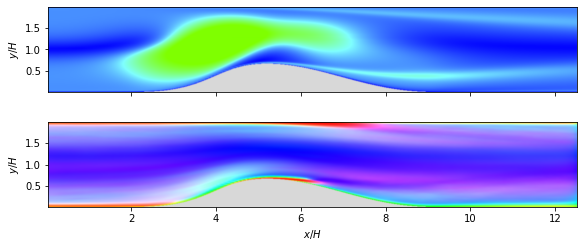

In [4]:
# load in dns and rans data
path = '/home/leonriccius/Documents/Fluid_Data/tensordata/ConvDivChannel/12600'
b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
grid = th.load(os.sep.join([path, 'grid-torch.th']))

barm_rans = BarMap()
barm_rans.load_from_variable(b_rans, grid[:,0:2])
barm_rans.calculate_barycentric_coordinates()

barm_dns = BarMap()
barm_dns.load_from_variable(b_dns, grid[:,0:2])
barm_dns.calculate_barycentric_coordinates()

# get extent of flow case
gamma = 0.9995
x_min, x_max = th.min(grid, axis=0)[0][[0,1]], th.max(grid, axis=0)[0][[0,1]]
x_mean = 0.5*(x_max - x_min)
x_min = x_mean - gamma*(x_mean - x_min)
x_max = x_mean - gamma*(x_mean - x_max)
extent=th.cat([x_min.unsqueeze(0), x_max.unsqueeze(0)]).T.flatten()

# plot flow case
fig, ax = plt.subplots(2,1, figsize = (8,3.5), sharey=True, sharex=True, constrained_layout=True)
barm_rans.plot_on_geometry(axis=ax[0], flowcase='CDC12600', resolution=0.01, cut_boundary=True, extent=extent)
barm_dns.plot_on_geometry(axis=ax[1], flowcase='CDC12600', resolution=0.01, cut_boundary=True, extent=extent)

ax[1].set_xlabel(r'$x/H$')
ax[0].set_ylabel(r'$y/H$')
ax[1].set_ylabel(r'$y/H$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/numerical_results/flow_cases/converging_diverging_channel/'
fig_name = '12600_stressType_rans_dns.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

## Curved Backward Facing Step

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


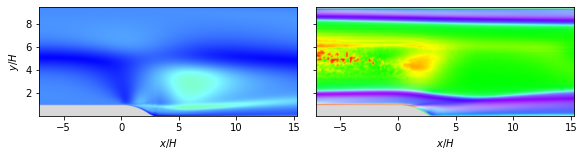

In [5]:
# load in dns and rans data
path = '/home/leonriccius/Documents/Fluid_Data/tensordata/CurvedBackwardFacingStep/13700/'
b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
grid = th.load(os.sep.join([path, 'grid-torch.th']))
mask = (b_dns != b_dns)[:,0,0]
b_dns[mask] = 0.0

barm_rans = BarMap()
barm_rans.load_from_variable(b_rans, grid[:,0:2])
barm_rans.calculate_barycentric_coordinates()

barm_dns = BarMap()
barm_dns.load_from_variable(b_dns, grid[:,0:2])
barm_dns.calculate_barycentric_coordinates()

# get extent of flow case
gamma = 0.995
x_min, x_max = th.min(grid, axis=0)[0][[0,1]], th.max(grid, axis=0)[0][[0,1]]
x_mean = 0.5*(x_max - x_min)
x_min = x_mean - gamma*(x_mean - x_min)
x_max = x_mean - gamma*(x_mean - x_max)
x_max[1] = x_max[1] #-0.001
extent=th.cat([x_min.unsqueeze(0), x_max.unsqueeze(0)]).T.flatten()

# plot flow case
fig, ax = plt.subplots(1,2, figsize = (8,4), sharey=True, sharex=True, constrained_layout=True)
barm_rans.plot_on_geometry(axis=ax[0], flowcase='CBFS', resolution=0.01, cut_boundary=True, extent=extent)
barm_dns.plot_on_geometry(axis=ax[1], flowcase='CBFS', resolution=0.01, cut_boundary=True, extent=extent)

ax[0].set_xlabel(r'$x/H$')
ax[1].set_xlabel(r'$x/H$')
ax[0].set_ylabel(r'$y/H$')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/flow_cases/curved_backward_facing_step'
fig_name = '13700_stressType_rans_dns.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

## Square Duct

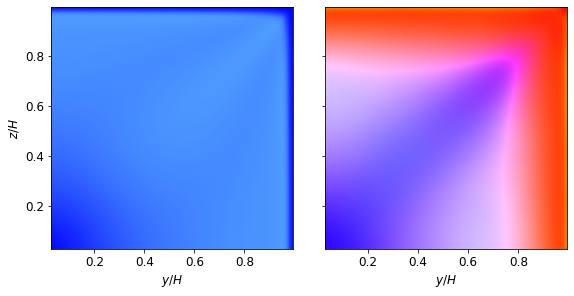

In [21]:
# load in dns and rans data
path = '/home/leonriccius/Documents/Fluid_Data/tensordata/SquareDuct/3500'
b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
grid = th.load(os.sep.join([path, 'grid-torch.th']))

barm_rans = BarMap()
barm_rans.load_from_variable(b_rans, grid[:,1:3])
barm_rans.calculate_barycentric_coordinates()

barm_dns = BarMap()
barm_dns.load_from_variable(b_dns, grid[:,1:3])
barm_dns.calculate_barycentric_coordinates()

# get extent of flow case
gamma = 0.995
x_min, x_max = th.min(grid, axis=0)[0][[1,2]], th.max(grid, axis=0)[0][[1,2]]
x_mean = 0.5*(x_max - x_min)
x_min = x_mean - gamma*(x_mean - x_min)
x_max = x_mean - gamma*(x_mean - x_max)
x_max[1] = x_max[1] #-0.001
extent=th.cat([x_min.unsqueeze(0), x_max.unsqueeze(0)]).T.flatten()

# plot flow case
fig, ax = plt.subplots(1,2, figsize = (8,4), sharey=True, sharex=True, constrained_layout=True)
barm_rans.plot_on_geometry(axis=ax[0], flowcase='CBFS', resolution=0.01, extent=extent)
barm_dns.plot_on_geometry(axis=ax[1], flowcase='CBFS', resolution=0.01, extent=extent)

ax[0].tick_params(axis='both', which='major', labelsize='large')
ax[1].tick_params(axis='both', which='major', labelsize='large')

ax[0].set_xlabel(r'$y/H$', fontsize='large')
ax[1].set_xlabel(r'$y/H$', fontsize='large')
ax[0].set_ylabel(r'$z/H$', fontsize='large')

fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/flow_cases/square_duct/'
fig_name = '3500_stressType_rans_dns.pdf'
# plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

## Converging Diverging Channel 7900

In [9]:
# # load in dns and rans data
# path = '/home/leonriccius/Documents/Fluid_Data/tensordata/ConvDivChannel/7900'
# b_dns = th.load(os.sep.join([path, 'b_dns-torch.th']))
# b_rans = th.load(os.sep.join([path, 'b_rans-torch.th']))
# grid = th.load(os.sep.join([path, 'grid-torch.th']))

# barm_rans = BarMap()
# barm_rans.load_from_variable(b_rans, grid[:,0:2])
# barm_rans.calculate_barycentric_coordinates()

# barm_dns = BarMap()
# barm_dns.load_from_variable(b_dns, grid[:,0:2])
# barm_dns.calculate_barycentric_coordinates()

# # get extent of flow case
# gamma = 0.9995
# x_min, x_max = th.min(grid, axis=0)[0][[0,1]], th.max(grid, axis=0)[0][[0,1]]
# x_mean = 0.5*(x_max - x_min)
# x_min = x_mean - gamma*(x_mean - x_min)
# x_max = x_mean - gamma*(x_mean - x_max)
# extent=th.cat([x_min.unsqueeze(0), x_max.unsqueeze(0)]).T.flatten()

# # plot flow case
# fig, ax = plt.subplots(2,1, figsize = (8,3.5), sharey=True, sharex=True, constrained_layout=True)
# barm_rans.plot_on_geometry(axis=ax[0], flowcase='CDC7900', resolution=0.01, cut_boundary=True, extent=extent)
# barm_dns.plot_on_geometry(axis=ax[1], flowcase='CDC7900', resolution=0.01, cut_boundary=True, extent=extent)

# ax[0].set_xlabel(r'$x/H$')
# ax[0].set_ylabel(r'$y/H$')
# ax[1].set_ylabel(r'$y/H$')

# fig_path = '/home/leonriccius/Documents/Leon_MastersThesis/figures_thesis/numerical_results/flow_cases/periodic_hills'
# fig_name = '10595_stressType_rans_dns.pdf'
# # plt.savefig(os.sep.join([fig_path, fig_name]), format='pdf')

In [10]:
# fig, ax = plt.subplots(figsize = (9,3.2))
# # ax.axis('equal')
# resolution = 0.01
# blthickness = 0.05
#     # extent = [0., 1., 0., 1.]
# extent = [barm_rans.cell_centers[:, 0].min(), barm_rans.cell_centers[:, 0].max(),
#           barm_rans.cell_centers[:, 1].min(), barm_rans.cell_centers[:, 1].max()]
# x_grid, y_grid = np.meshgrid(np.arange(*extent[0:2], resolution), np.arange(*extent[2:4], resolution))
# c_int = np.zeros((len(x_grid.flatten()), 3))
# for i in range(3):
#     c_int[:, i] = sp.interpolate.griddata(barm_rans.cell_centers,
#                                           barm_rans.c[:, i],
#                                           (x_grid.flatten(), y_grid.flatten()),
#                                           method='linear')  # ,  fill_value='nan')

# c_int = c_int/np.expand_dims(c_int.max(axis=1), axis=1)
# c_int = c_int.reshape(x_grid.shape[0], x_grid.shape[1], 3)

# mask = mask_boundary_points(x_grid, y_grid, flowcase='PH')
# c_int[~mask] = 0.8

# ax.imshow(c_int, extent=extent, origin='lower', interpolation='gaussian')

# # ax.set_ylim([0.2,2.8])